In [91]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv1D, MaxPooling1D, Dense, Input, BatchNormalization
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  0


In [92]:
data = pd.read_csv('data.csv')
y = data['child_mort']
X = data.drop(['child_mort', 'country'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
x_train_reshaped = np.expand_dims(x_train.values, axis=1)  # shape: (samples, 1, features)

In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, BatchNormalization

model = Sequential([
    Input(shape=(1, x_train.shape[1])),  # Shape: (timesteps=1, features)
    SimpleRNN(128, activation='linear'),
    BatchNormalization(),
    Dense(1, activation='linear')
])

from tensorflow import keras

adam = keras.optimizers.Adam(learning_rate=0.1)


# Compilación
model.compile(
    optimizer=adam,
    loss='mse',  # Error cuadrático medio para regresión
    metrics=['mae']  # Error absoluto medio
)

# Entrenamiento
history = model.fit(
    x_train_reshaped, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=4,
    # verbose=1
)


Epoch 1/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1338.3352 - mae: 25.9710 - val_loss: 9585.7266 - val_mae: 56.2114
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1467.2469 - mae: 28.4678 - val_loss: 1619.4946 - val_mae: 30.3064
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1535.5959 - mae: 28.6910 - val_loss: 1094.9556 - val_mae: 27.5484
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1195.8680 - mae: 24.6736 - val_loss: 962.3689 - val_mae: 27.8084
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1322.0465 - mae: 26.0202 - val_loss: 1015.6976 - val_mae: 27.0555
Epoch 6/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 895.5513 - mae: 21.7454 - val_loss: 935.2852 - val_mae: 27.5895
Epoch 7/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1480.3606 - mae: 26.7378 - val_loss: 934.3183 - val_mae: 27.6503
Epoch 8/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1922.5409 - mae: 30.2371 - val_loss: 1002.3296 - val_mae: 26.9805
Epoc

In [101]:
model.summary()


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_10 (SimpleRNN)       │ (None, 128)            │        17,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 54,021 (211.02 KB)

 Trainable params: 17,921 (70.00 KB)

 Non-trainable params: 256 (1.00 KB)

 Optimizer params: 35,844 (140.02 KB)

In [102]:
# model.evaluate(np.expand_dims(x_test.values, axis=1), y_test)
model.predict(np.expand_dims(x_test.values, axis=1))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


array([[ 74.269844 ],
       [ 64.16972  ],
       [ 61.998173 ],
       [ 77.50283  ],
       [ 25.395237 ],
       [  2.1482   ],
       [ 67.93485  ],
       [-67.82436  ],
       [ 52.989944 ],
       [ 76.84707  ],
       [ 70.037155 ],
       [ 14.659994 ],
       [  1.1940455],
       [ 36.800644 ],
       [ 50.395294 ],
       [ 79.07963  ],
       [ 78.52192  ],
       [ 36.088356 ],
       [ 47.132442 ],
       [ 65.19107  ],
       [ 64.99059  ],
       [ 67.99457  ],
       [ 75.8712   ],
       [ 49.038124 ],
       [-60.933205 ],
       [ 10.335822 ],
       [ 77.37201  ],
       [ 24.799807 ],
       [ 50.544094 ],
       [ 76.701256 ],
       [ 69.20589  ],
       [ 61.20224  ],
       [ 69.63069  ],
       [ 53.920662 ]], dtype=float32)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


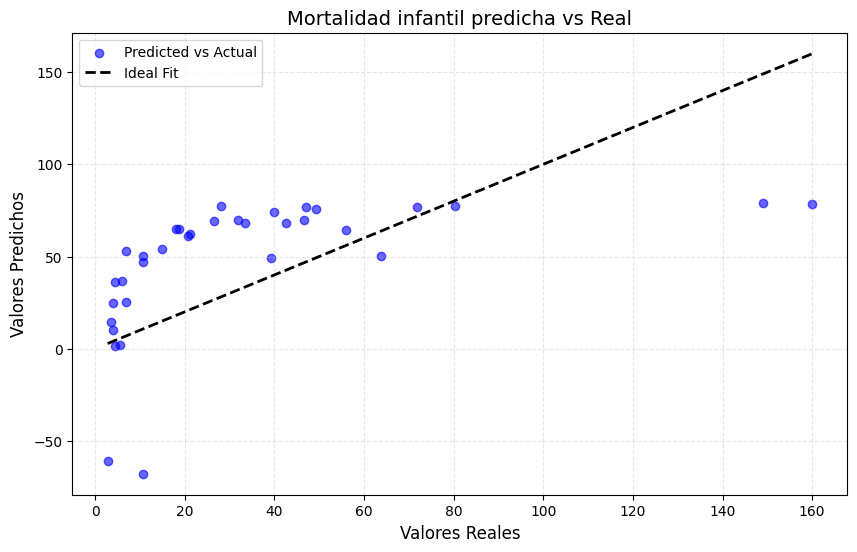

In [106]:
import matplotlib.pyplot as plt

# Generate predictions
x_test_reshaped = np.expand_dims(x_test.values, axis=1)  # Reshape test data
y_pred = model.predict(x_test_reshaped).flatten()  # Flatten predictions

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', label='Predicted vs Actual')

# Add ideal line (perfect predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         'k--', lw=2, label='Ideal Fit')

# Labels and title
plt.xlabel('Valores Reales', fontsize=12)
plt.ylabel('Valores Predichos', fontsize=12)
plt.title('Mortalidad infantil predicha vs Real', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)

# Annotate metrics (MAE and R²)
# mae = mean_absolute_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)
# plt.text(0.05, 0.95, f'MAE: {mae:.2f}\nR²: {r2:.2f}', 
#          transform=plt.gca().transAxes,
#          verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))

plt.show()

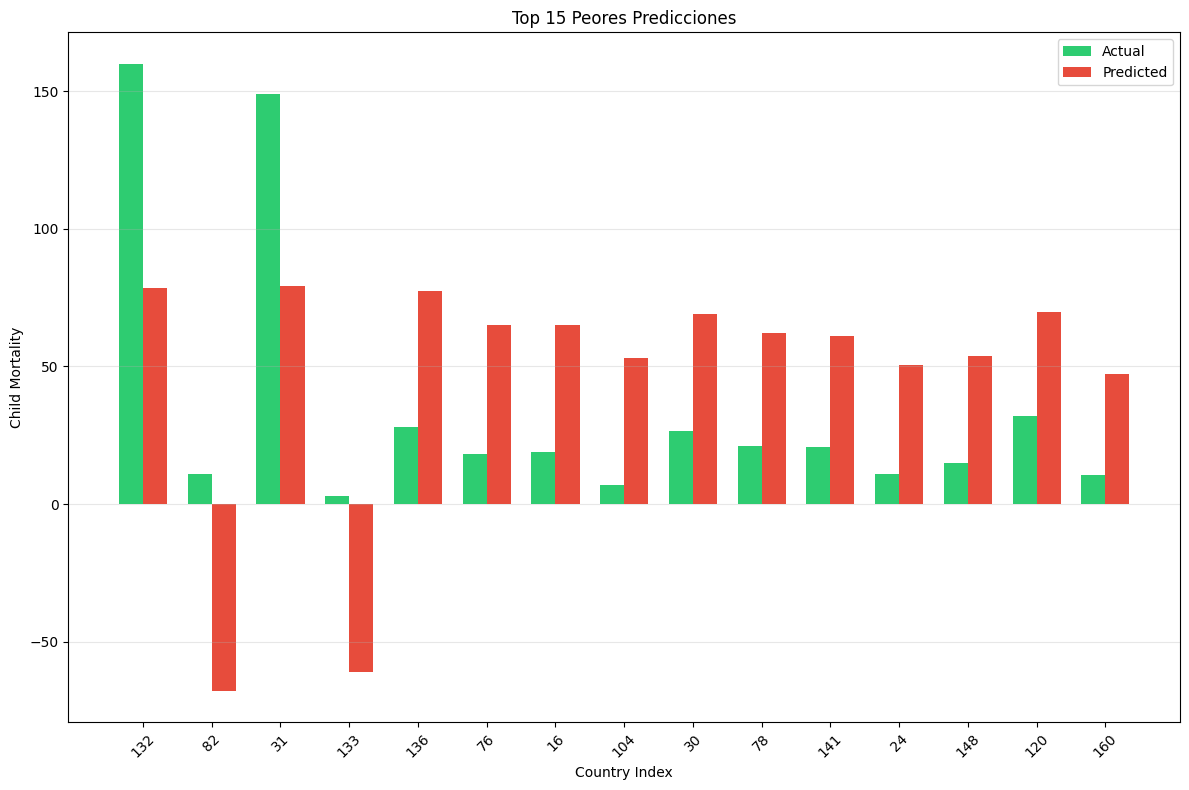

In [104]:
# Get top N worst predictions for analysis
N = 15
test_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
test_df['Abs_Error'] = np.abs(test_df['Actual'] - test_df['Predicted'])
worst_predictions = test_df.sort_values('Abs_Error', ascending=False).head(N)

# Plot
plt.figure(figsize=(12, 8))
x_axis = np.arange(len(worst_predictions))
width = 0.35

plt.bar(x_axis - width/2, worst_predictions['Actual'], width, label='Actual', color='#2ecc71')
plt.bar(x_axis + width/2, worst_predictions['Predicted'], width, label='Predicted', color='#e74c3c')

plt.xticks(x_axis, worst_predictions.index, rotation=45)
plt.xlabel('Country Index')
plt.ylabel('Child Mortality')
plt.title(f'Top {N} Peores Predicciones')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

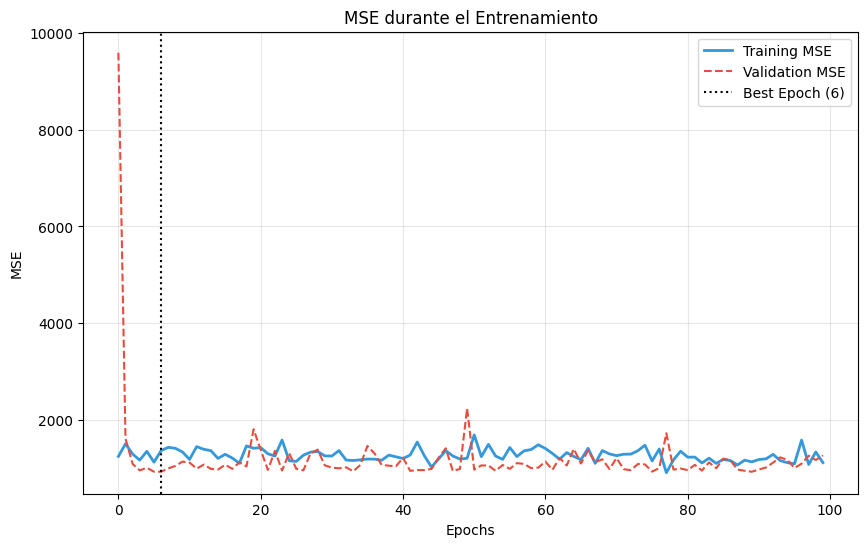

In [105]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training MSE', color='#3498db', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation MSE', color='#e74c3c', linestyle='--')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('MSE durante el Entrenamiento')
plt.legend()
plt.grid(alpha=0.3)

# Highlight best epoch
best_epoch = np.argmin(history.history['val_loss'])
plt.axvline(best_epoch, color='k', linestyle=':', label=f'Best Epoch ({best_epoch})')
plt.legend()
plt.show()